In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 


In [2]:
df = pd.read_excel("solarsystem.xlsx")
df

,Planet Name,Host Name,Planet Radius (km),Orbital Period (days),Orbital Semi-Major Axis (AU),Planet Mass (Earth Masses),Planet Equilibrium Temperature (K),Stellar Radius (Solar Radius),Stellar Effective Temperature (K),Distance to Planetary System (AU),Insolation Flux (Earth=1),Density (g/cm³),Stellar Metallicity,Orbital Eccentricity,Stellar Mass (Solar Mass),Stellar Luminosity (Solar Luminosity),Composition,Hill Radius (AU)
0,Mercury,Sun,2439.7,87.97,0.39,0.055,440,1,5778,0,9.1000,5.430,0.0122,0.2056,1,1,Rocky,0.029
1,Venus,Sun,6051.8,224.70,0.72,0.815,737,1,5778,0,1.9100,5.240,0.0122,0.0067,1,1,Rocky,0.220
2,Earth,Sun,6371.0,365.25,1.00,1.000,255,1,5778,0,1.0000,5.510,0.0122,0.0167,1,1,Rocky,0.280
3,Mars,Sun,3389.5,687.00,1.52,0.107,210,1,5778,0,0.4300,3.930,0.0122,0.0934,1,1,Rocky,0.660
4,Jupiter,Sun,69911.0,4332.59,5.20,317.800,165,1,5778,0,0.0400,1.330,0.0122,0.0484,1,1,Gas Giant,52.000
5,Saturn,Sun,58232.0,10759.00,9.58,95.200,134,1,5778,0,0.0100,0.687,0.0122,0.0565,1,1,Gas Giant,67.000
6,Uranus,Sun,25362.0,30687.00,19.20,14.500,76,1,5778,0,0.0037,1.270,0.0122,0.0460,1,1,Ice Giant,73.000
7,Neptune,Sun,24622.0,60190.00,30.10,17.100,72,1,5778,0,0.0015,1.640,0.0122,0.0090,1,1,Ice Giant,86.000


In [3]:
df.isnull().sum().sum()

0

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Planet Name                            8 non-null      object 
 1   Host Name                              8 non-null      object 
 2   Planet Radius (km)                     8 non-null      float64
 3   Orbital Period (days)                  8 non-null      float64
 4   Orbital Semi-Major Axis (AU)           8 non-null      float64
 5   Planet Mass (Earth Masses)             8 non-null      float64
 6   Planet Equilibrium Temperature (K)     8 non-null      int64  
 7   Stellar Radius (Solar Radius)          8 non-null      int64  
 8   Stellar Effective Temperature (K)      8 non-null      int64  
 9   Distance to Planetary System (AU)      8 non-null      int64  
 10  Insolation Flux (Earth=1)              8 non-null      float64
 11  Density (g

In [6]:
df.describe()

,Planet Radius (km),Orbital Period (days),Orbital Semi-Major Axis (AU),Planet Mass (Earth Masses),Planet Equilibrium Temperature (K),Stellar Radius (Solar Radius),Stellar Effective Temperature (K),Distance to Planetary System (AU),Insolation Flux (Earth=1),Density (g/cm³),Stellar Metallicity,Orbital Eccentricity,Stellar Mass (Solar Mass),Stellar Luminosity (Solar Luminosity),Hill Radius (AU)
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.0,8.0,8.0,8.000000,8.000000,8.0000,8.000000,8.0,8.0,8.000000
mean,24547.375000,13416.688750,8.463750,55.822125,261.125000,1.0,5778.0,0.0,1.561900,3.129625,0.0122,0.060288,1.0,1.0,34.898625
std,26191.747578,21579.285025,10.852036,110.605697,225.687798,0.0,0.0,0.0,3.119718,2.102191,0.0000,0.065437,0.0,0.0,38.126202
min,2439.700000,87.970000,0.390000,0.055000,72.000000,1.0,5778.0,0.0,0.001500,0.687000,0.0122,0.006700,1.0,1.0,0.029000
25%,5386.225000,330.112500,0.930000,0.638000,119.500000,1.0,5778.0,0.0,0.008425,1.315000,0.0122,0.014775,1.0,1.0,0.265000
50%,15496.500000,2509.795000,3.360000,7.750000,187.500000,1.0,5778.0,0.0,0.235000,2.785000,0.0122,0.047200,1.0,1.0,26.330000
75%,33579.500000,15741.000000,11.985000,36.625000,301.250000,1.0,5778.0,0.0,1.227500,5.287500,0.0122,0.065725,1.0,1.0,68.500000
max,69911.000000,60190.000000,30.100000,317.800000,737.000000,1.0,5778.0,0.0,9.100000,5.510000,0.0122,0.205600,1.0,1.0,86.000000


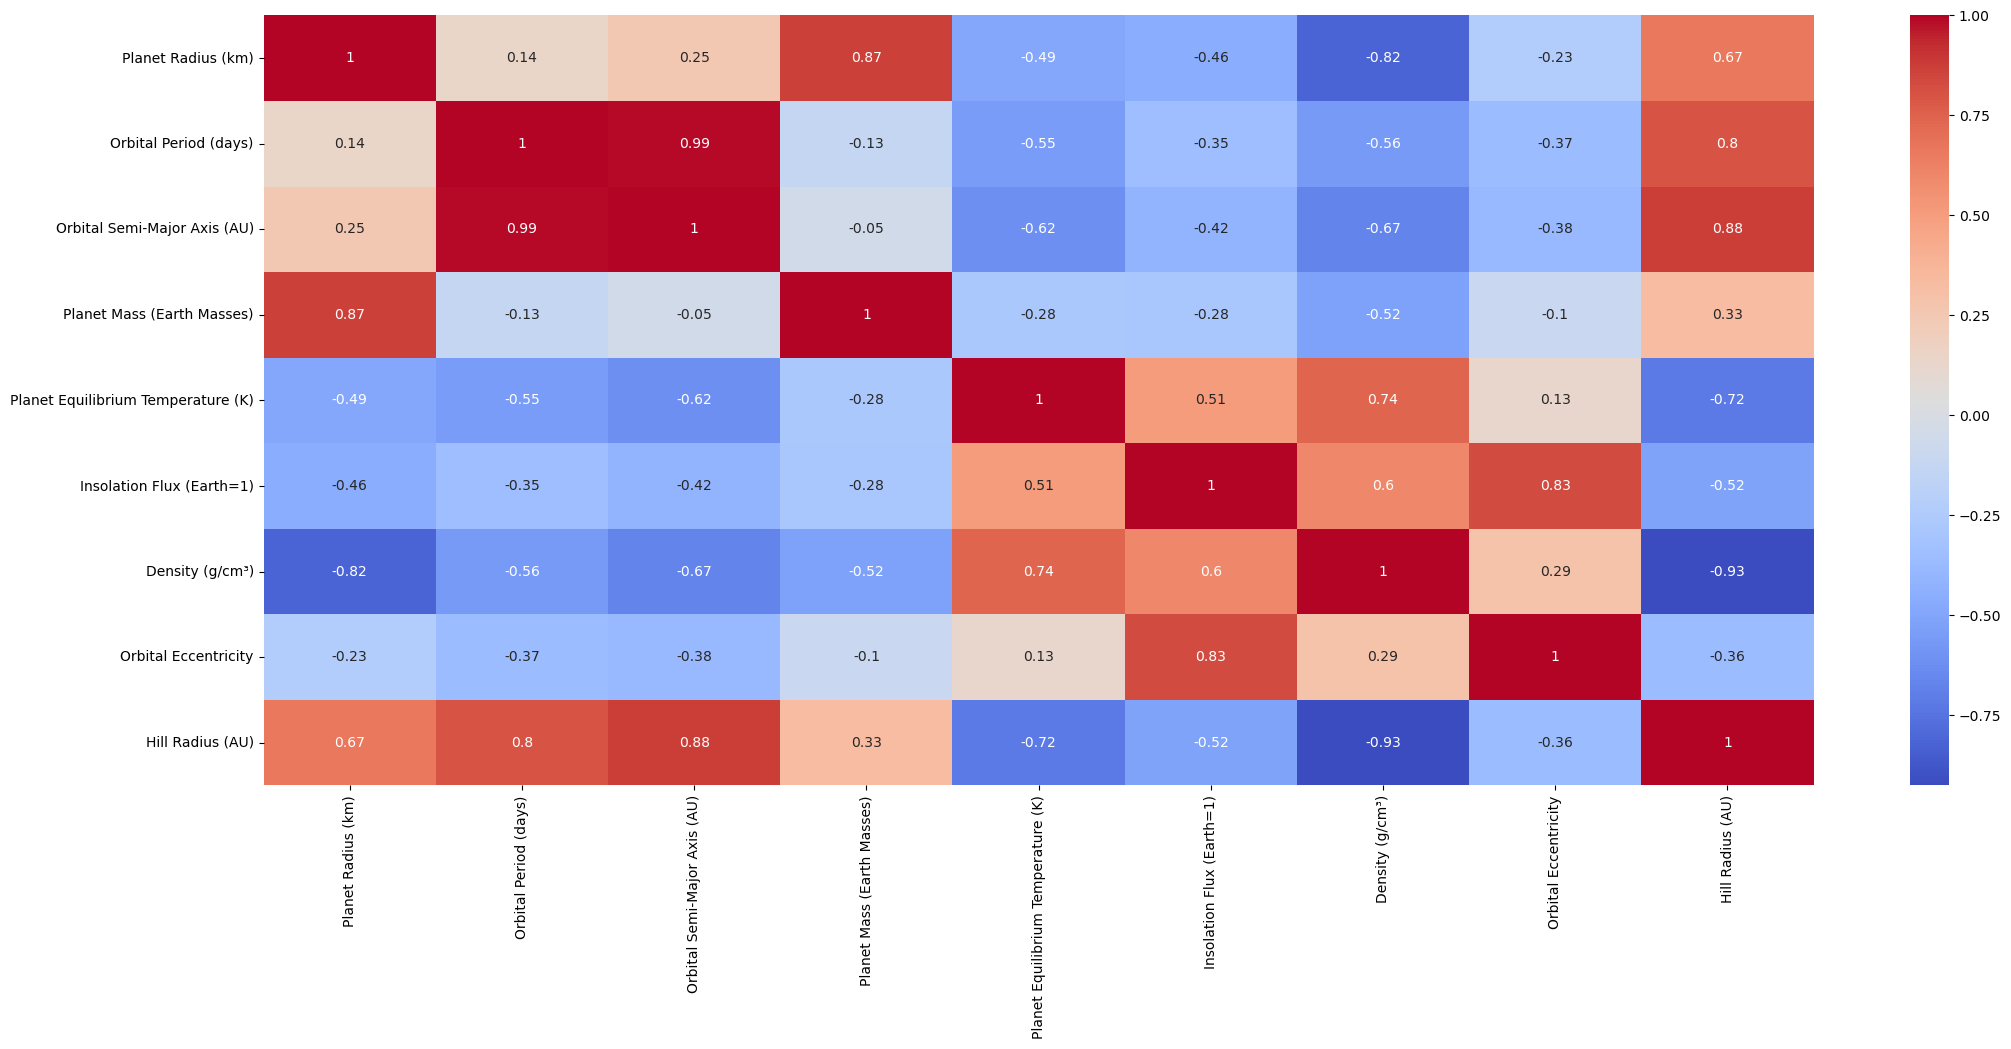

In [7]:
a = df.drop(columns=df.select_dtypes(include=['object']).columns)
a.drop(columns=['Stellar Radius (Solar Radius)',"Stellar Effective Temperature (K)","Distance to Planetary System (AU)","Stellar Metallicity","Stellar Mass (Solar Mass)","Stellar Luminosity (Solar Luminosity)"],inplace=True)
plt.figure(figsize=(25,10))
sns.heatmap(a.corr(),annot=True,cmap="coolwarm")
plt.show()

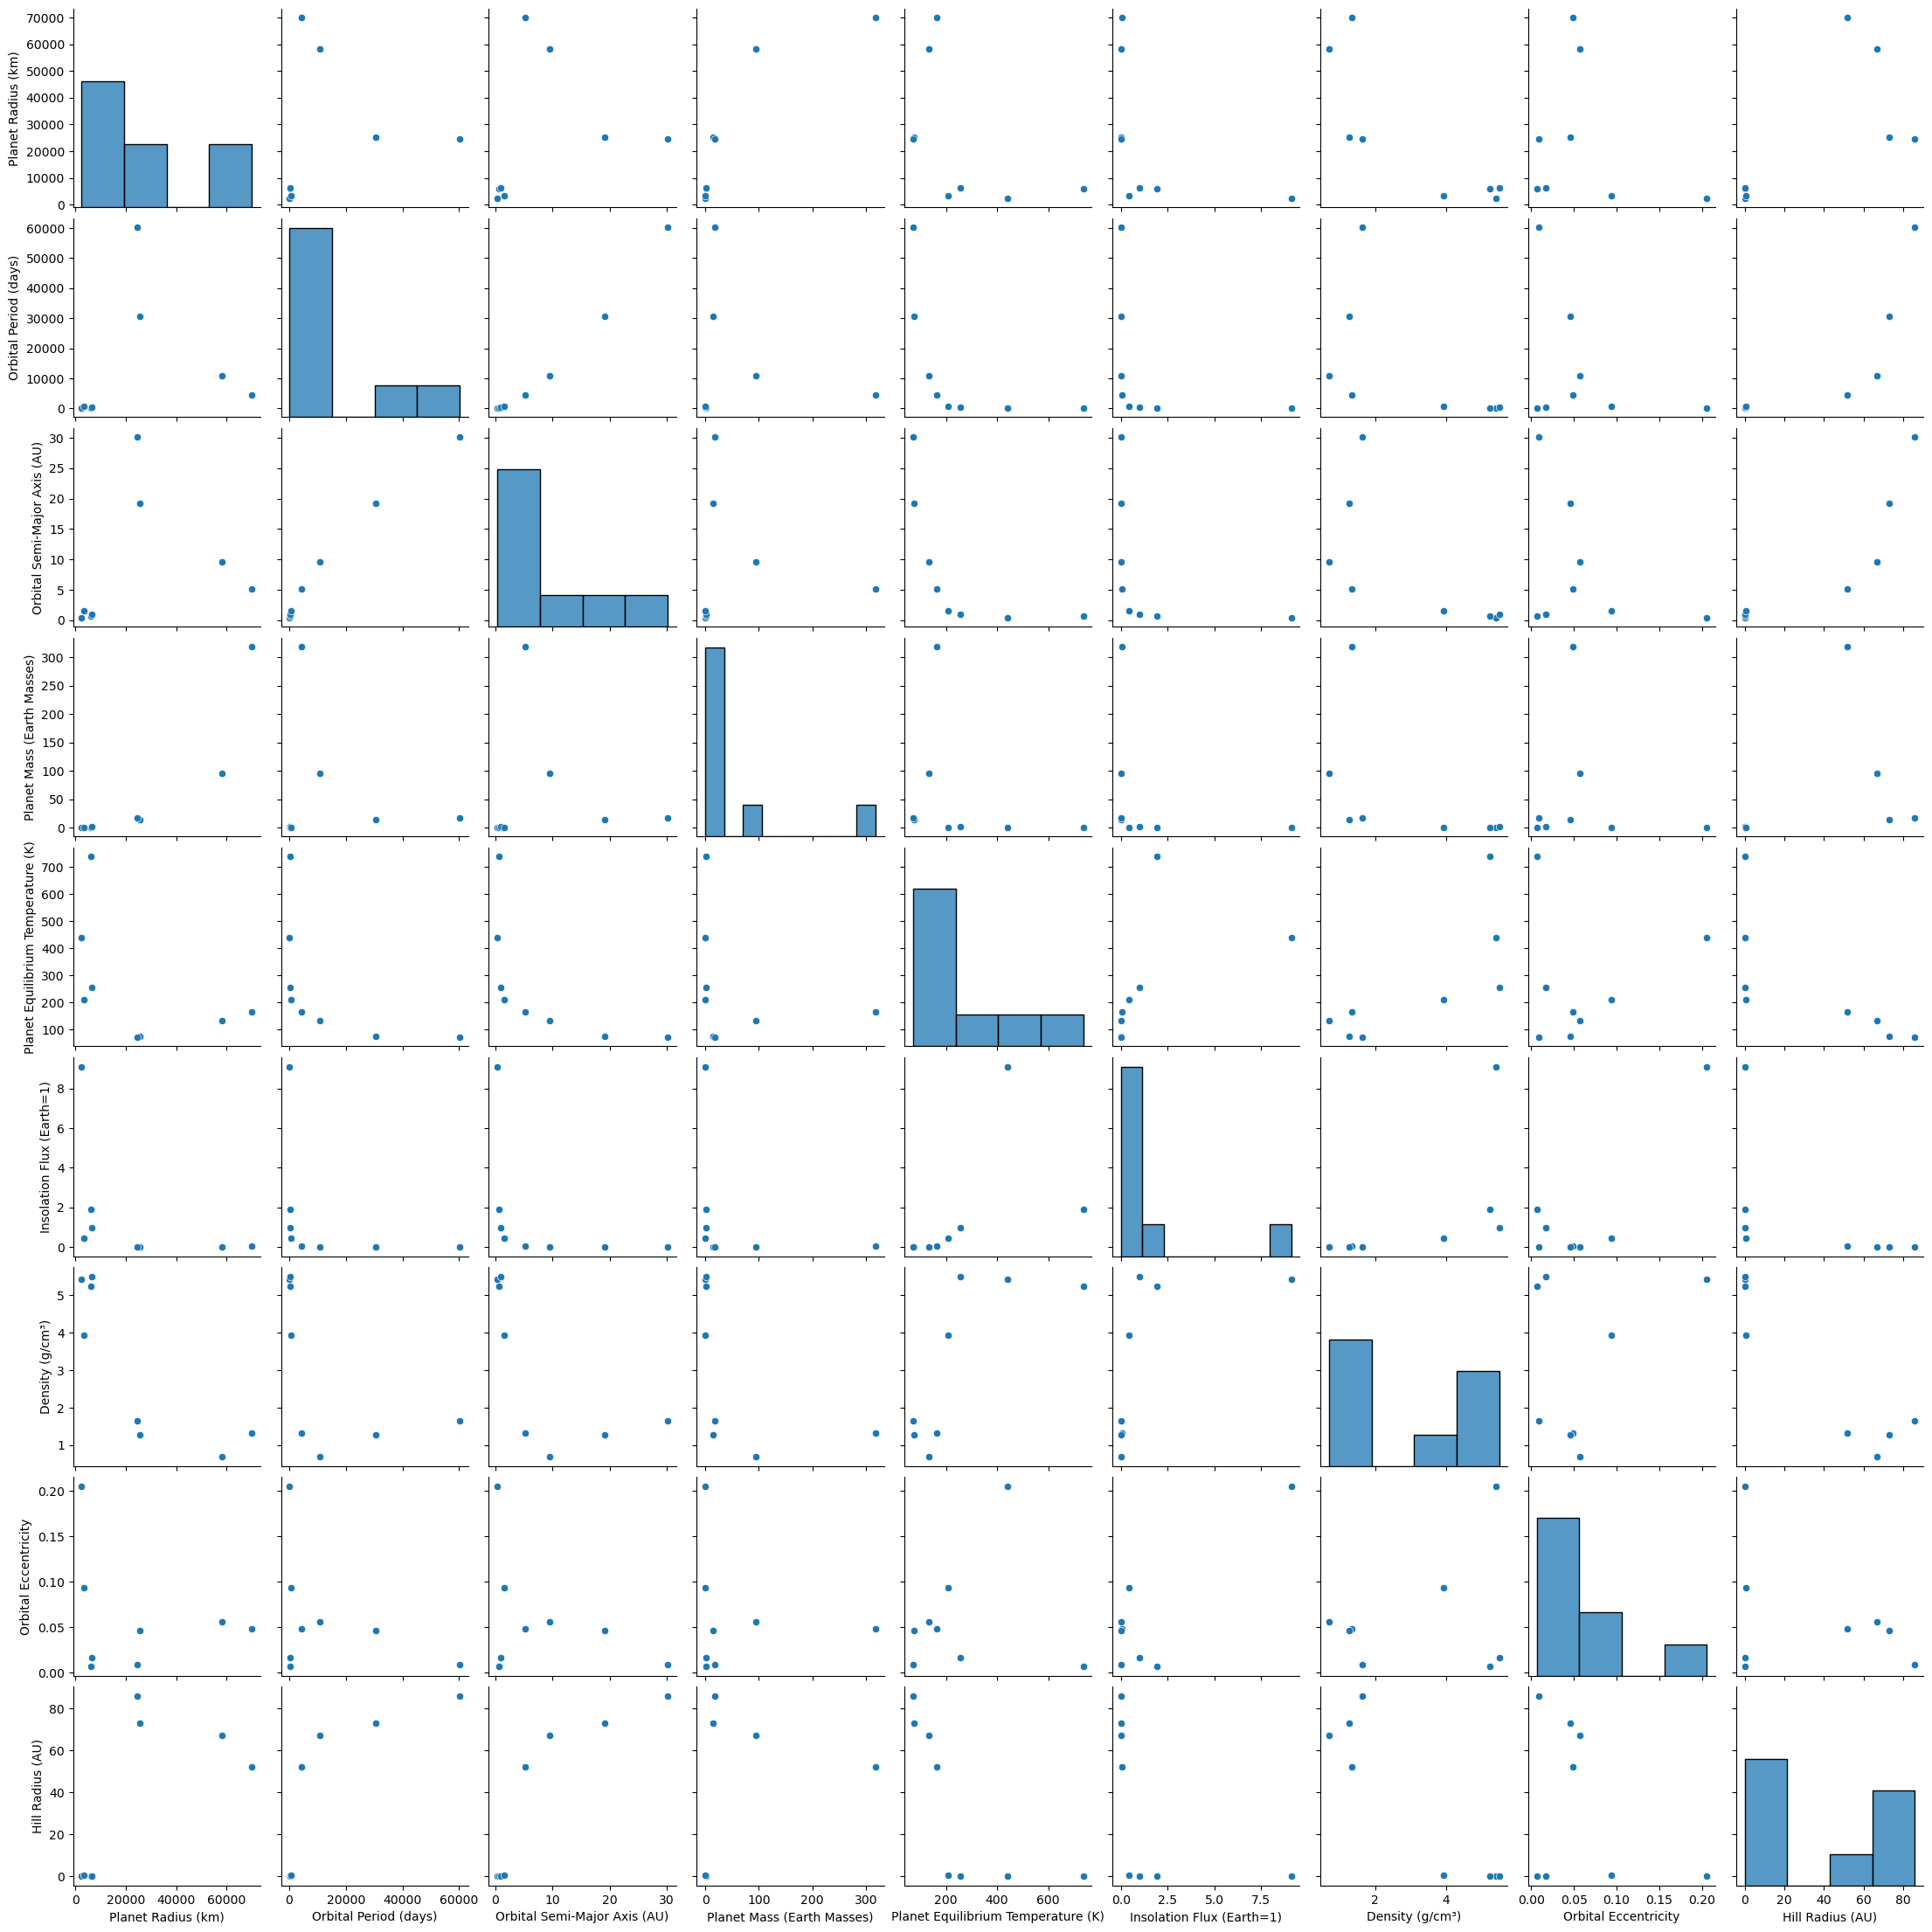

In [8]:
sns.pairplot(a)
plt.show()

<Axes: >

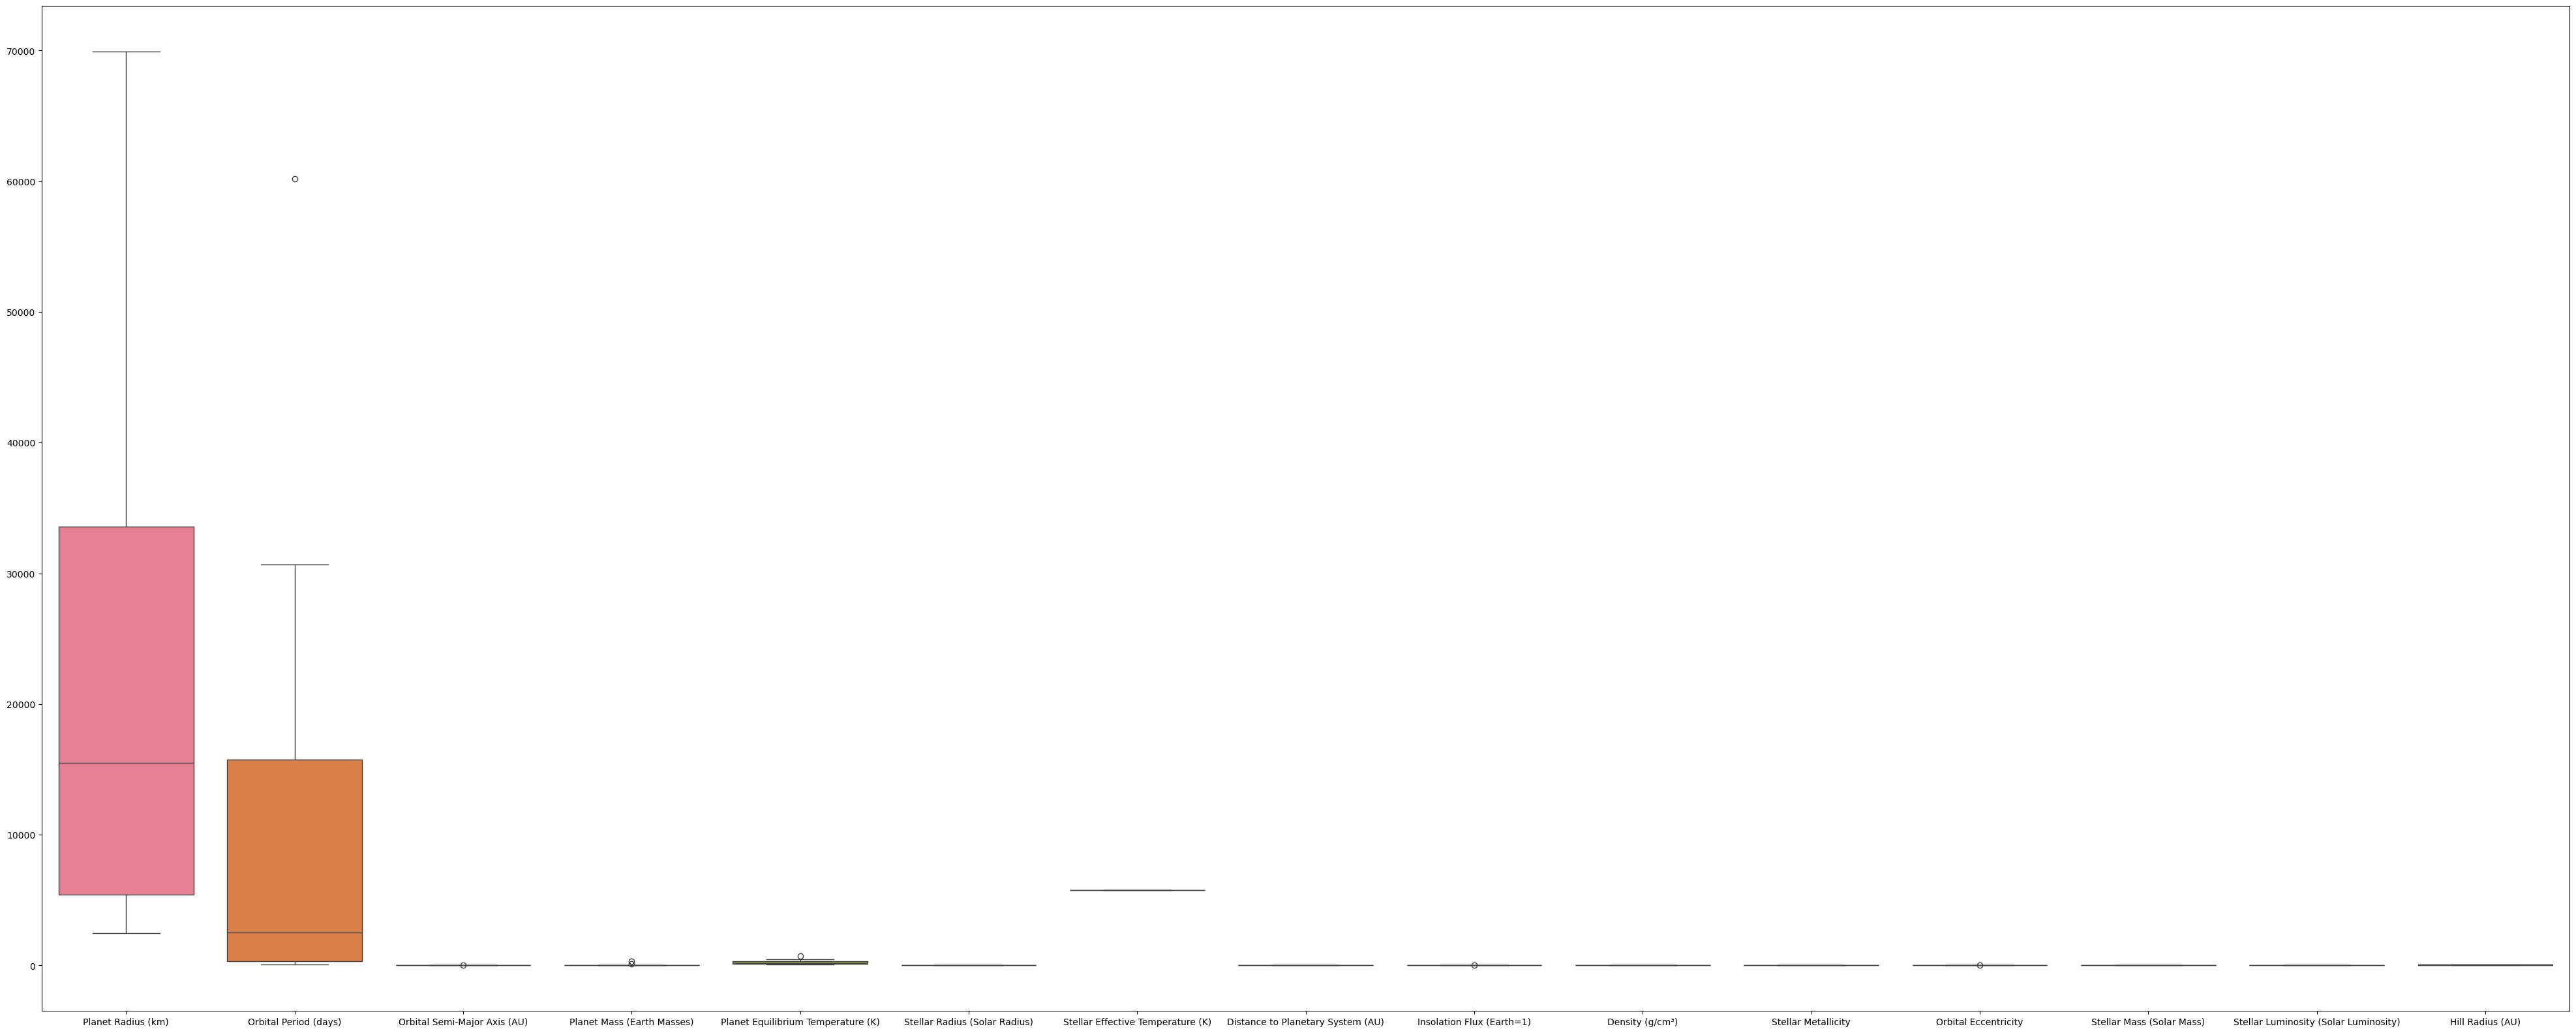

In [9]:
plt.figure(figsize=(50,20))
sns.boxplot(data=df)

# IQR

In [11]:
q1 = df['Orbital Semi-Major Axis (AU)'].quantile(0.25)
q3 = df['Orbital Semi-Major Axis (AU)'].quantile(0.75)
IQR = q3-q1
IQR

11.055

In [12]:
min_range = q1 - IQR
max_range = q3 + (1.5*IQR)
max_rangemin_range = q1 - IQR
max_range = q3 + (1.5*IQR)
max_range

28.5675

In [13]:
df1 = df[df['Orbital Semi-Major Axis (AU)']<=max_range]

<Axes: >

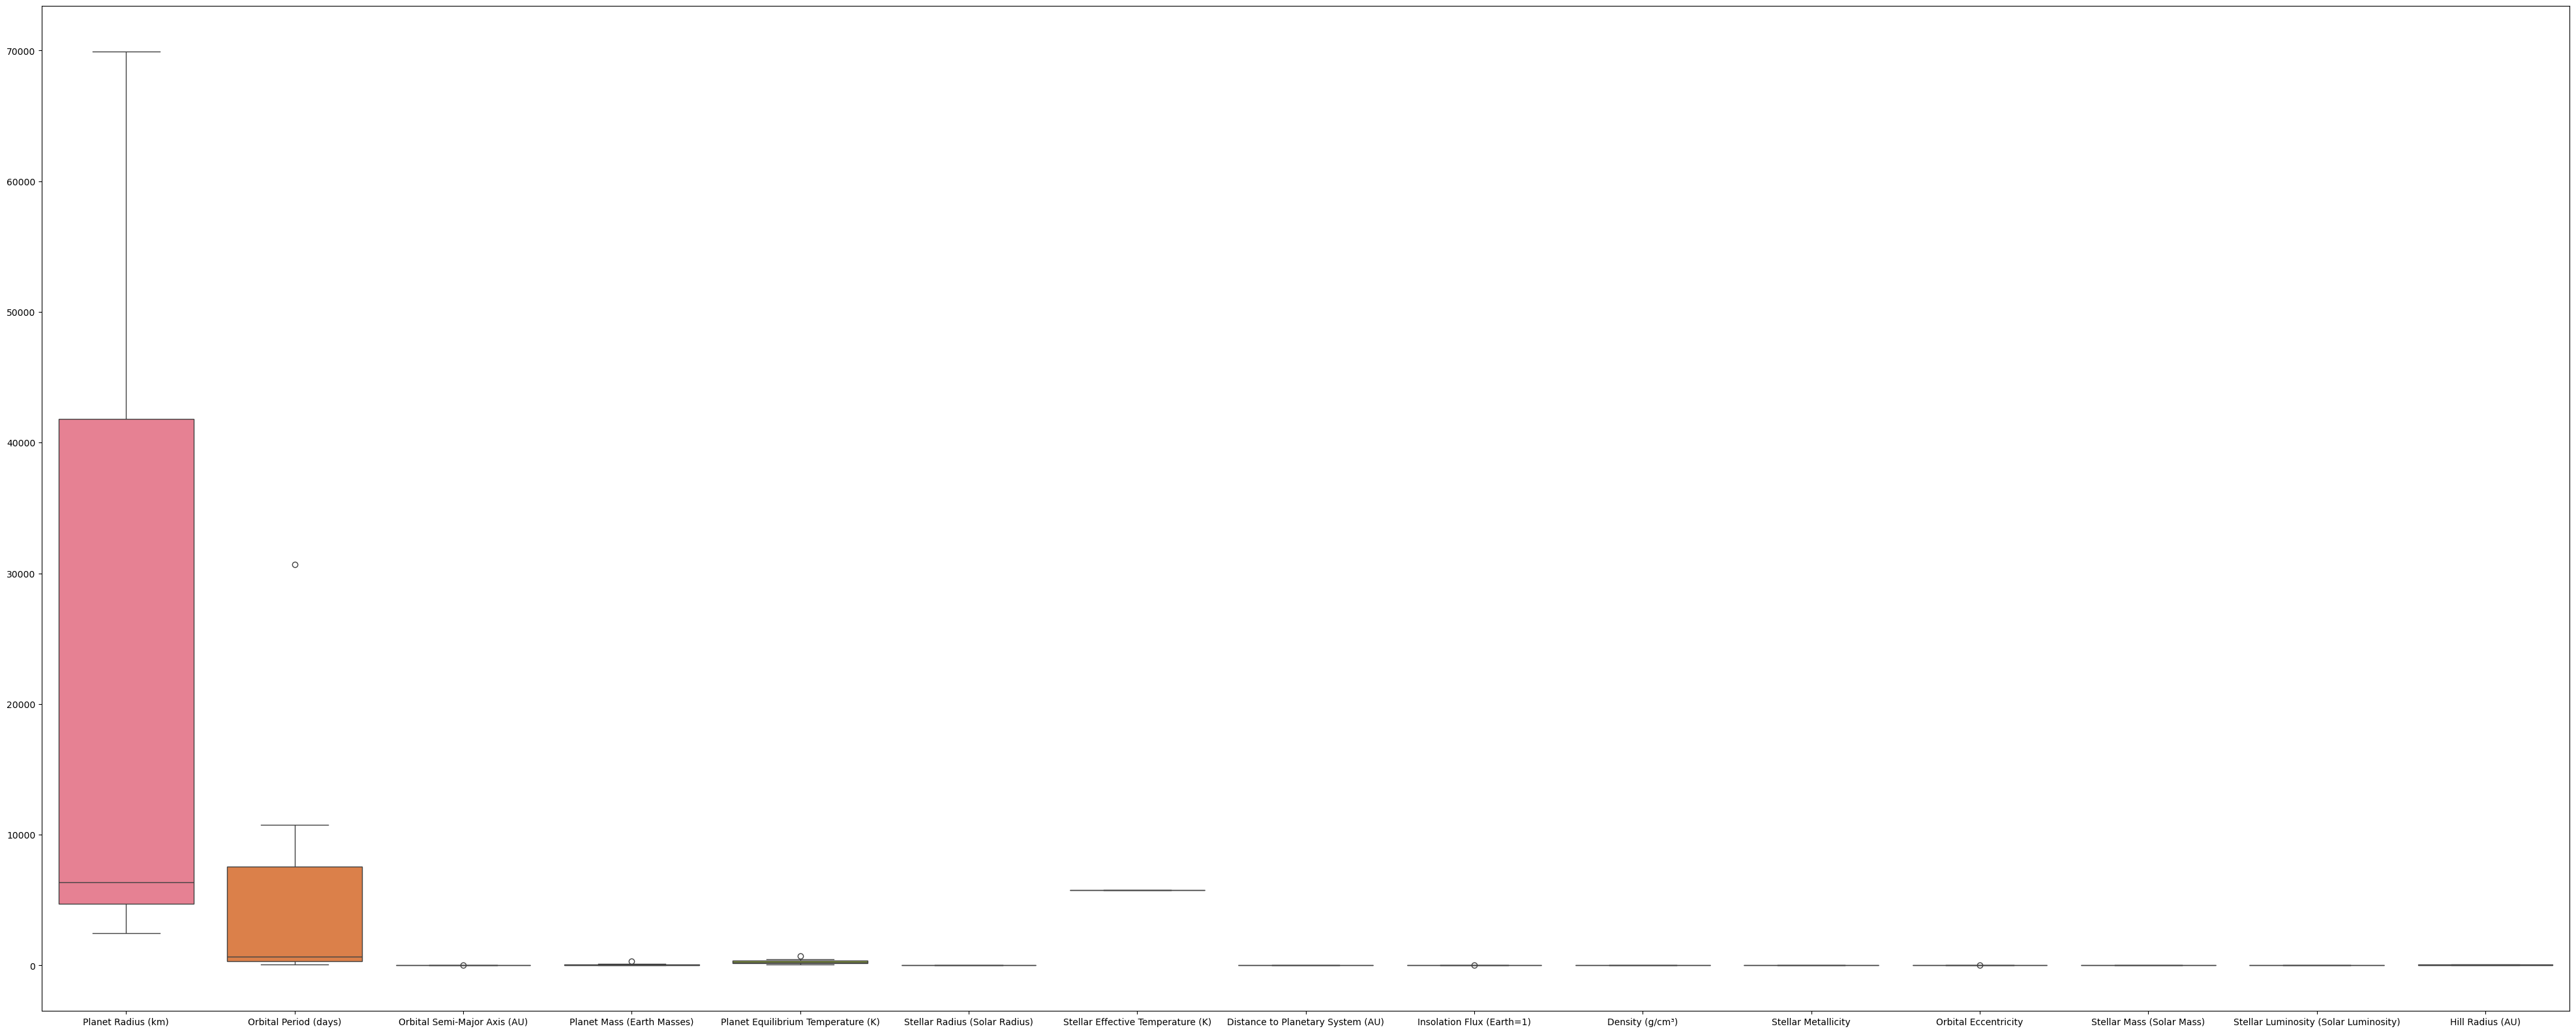

In [14]:
plt.figure(figsize=(50,20))
sns.boxplot(data=df1)

# enncoding

In [16]:
df = pd.get_dummies(df1,drop_first=True)

# feature scaling

In [18]:
scaler = StandardScaler()
df[['Orbital Period (days)','Orbital Semi-Major Axis (AU)']] = scaler.fit_transform(df[['Orbital Period (days)','Orbital Semi-Major Axis (AU)']])
df

,Planet Radius (km),Orbital Period (days),Orbital Semi-Major Axis (AU),Planet Mass (Earth Masses),Planet Equilibrium Temperature (K),Stellar Radius (Solar Radius),Stellar Effective Temperature (K),Distance to Planetary System (AU),Insolation Flux (Earth=1),Density (g/cm³),...,Stellar Luminosity (Solar Luminosity),Hill Radius (AU),Planet Name_Jupiter,Planet Name_Mars,Planet Name_Mercury,Planet Name_Saturn,Planet Name_Uranus,Planet Name_Venus,Composition_Ice Giant,Composition_Rocky
0,2439.7,-0.638165,-0.775006,0.055,440,1,5778,0,9.1000,5.430,...,1,0.029,False,False,True,False,False,False,False,True
1,6051.8,-0.625037,-0.723680,0.815,737,1,5778,0,1.9100,5.240,...,1,0.220,False,False,False,False,False,True,False,True
2,6371.0,-0.611543,-0.680130,1.000,255,1,5778,0,1.0000,5.510,...,1,0.280,False,False,False,False,False,False,False,True
3,3389.5,-0.580651,-0.599252,0.107,210,1,5778,0,0.4300,3.930,...,1,0.660,False,True,False,False,False,False,False,True
4,69911.0,-0.230636,-0.026885,317.800,165,1,5778,0,0.0400,1.330,...,1,52.000,True,False,False,False,False,False,False,False
5,58232.0,0.386367,0.654356,95.200,134,1,5778,0,0.0100,0.687,...,1,67.000,False,False,False,True,False,False,False,False
6,25362.0,2.299665,2.150597,14.500,76,1,5778,0,0.0037,1.270,...,1,73.000,False,False,False,False,True,False,True,False


# train test split

In [20]:
X = df[['Orbital Semi-Major Axis (AU)']]
Y = df['Orbital Period (days)']
X.shape,Y.shape

((7, 1), (7,))

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [22]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(5, 1) (5,) (2, 1) (2,)


# model selection

In [24]:
le = LinearRegression()
le.fit(x_train,y_train)

LinearRegression()

In [25]:
input = [[2]]
y_pred = le.predict(input)[0]

C:\Users\swaya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
y_train_pred = le.predict(x_train)

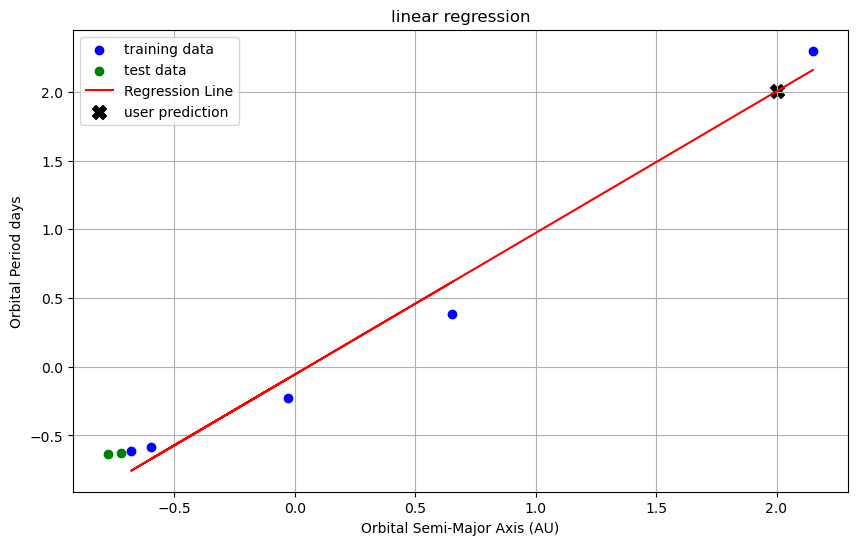

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(x_train,y_train,color='blue',label = "training data")
plt.scatter(x_test,y_test,color='green',label = "test data")
plt.plot(x_train, y_train_pred,color='red',label="Regression Line")
plt.scatter(input,y_pred,color='black',marker="X",s=100,label='user prediction')
plt.xlabel("Orbital Semi-Major Axis (AU)")
plt.ylabel("Orbital Period days")
plt.title("linear regression")
plt.legend()
plt.grid(True)
plt.show()